In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Görselleştirme ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)



In [2]:
# Veri setini okuma
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# TotalCharges sütunundaki boşlukları (" ") nan yapıp sayıya çevirme
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Boş verileri silme 
df.dropna(inplace=True)

# Gereksiz ID sütununu silme
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Hedef değişkeni (Churn) 1 ve 0'a çevirme
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(f" Güncel Boyut: {df.shape}")
df.head() # İlk 5 satırı göster

 Güncel Boyut: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


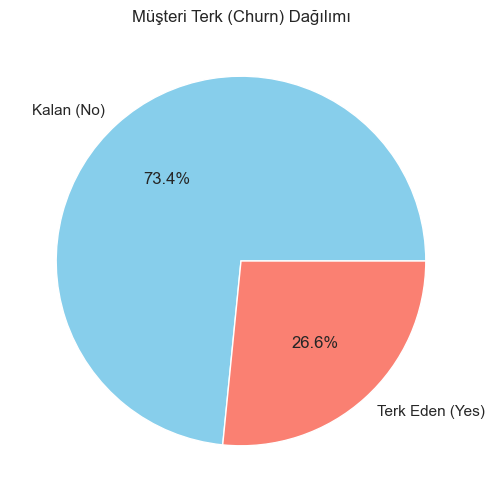

In [3]:
# Churn Dağılımı
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                colors=['skyblue', 'salmon'], 
                                labels=['Kalan (No)', 'Terk Eden (Yes)'])
plt.title('Müşteri Terk (Churn) Dağılımı')
plt.ylabel('')
plt.show()

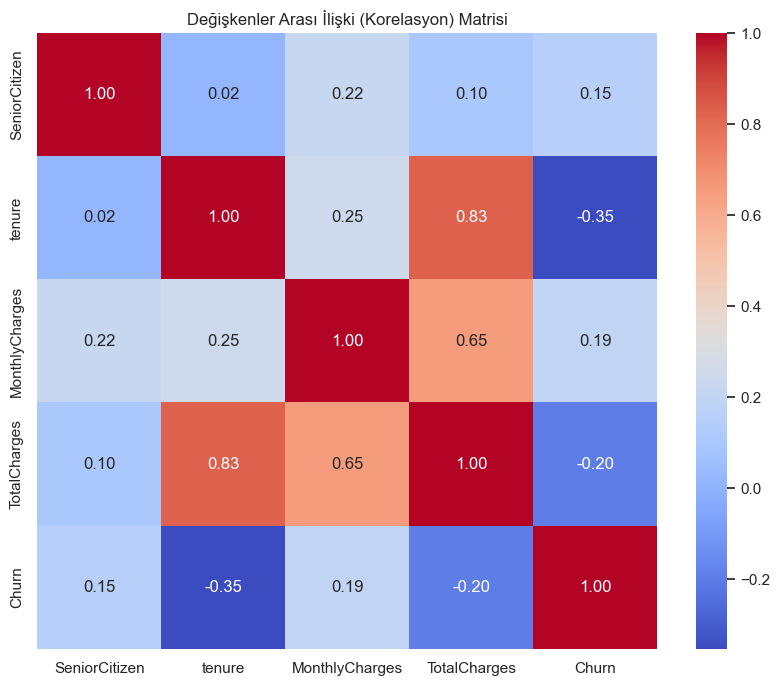

In [4]:
# Sadece sayısal sütunları seçip korelasyona bakma
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası İlişki (Korelasyon) Matrisi')
plt.show()

In [5]:
# Kategorik verileri sayıya çevirme 
df_encoded = pd.get_dummies(df, drop_first=True)

# X (özellikler) ve y (hedef) ayrımı
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Eğitim ve Test setine ayırma (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Eğitim Seti Boyutu: (5625, 30)
Test Seti Boyutu: (1407, 30)



Model Başarısı : %78.46


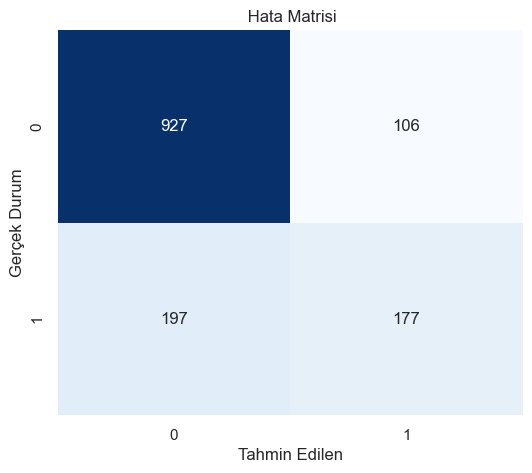

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [6]:
# Modeli kurma (100 Ağaç)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Test etme
y_pred = rf_model.predict(X_test)

# Sonuçları Yazdırma
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Başarısı : %{acc*100:.2f}")

# Hata Matrisi Görselleştirmesi
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(' Hata Matrisi')
plt.ylabel('Gerçek Durum')
plt.xlabel('Tahmin Edilen')
plt.show()

#  Rapor
print(classification_report(y_test, y_pred))

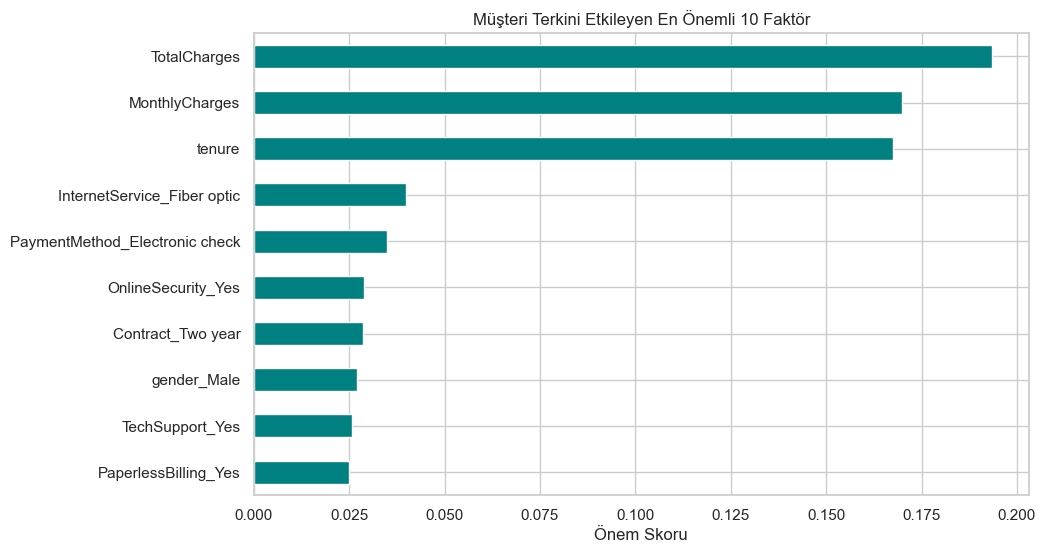

In [7]:
# Özellik önemlerini çekme
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)

# Grafik çizme
plt.figure(figsize=(10, 6))
top_importances.plot(kind='barh', color='teal')
plt.title('Müşteri Terkini Etkileyen En Önemli 10 Faktör')
plt.xlabel('Önem Skoru')
plt.gca().invert_yaxis() # En önemlisi en üstte
plt.show()